<a href="https://colab.research.google.com/github/entirety2019/Meetup2019/blob/master/Session2/MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install keras
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.preprocessing import image
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
batch_size = 16
num_classes = 10
epoch = 10

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
x_train.shape,y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [8]:
from keras.layers import Activation
model = Sequential()
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False))
model.add(BatchNormalization(name='norm_1'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, 3, 3, activation='relu',use_bias=False))
model.add(BatchNormalization(name='norm_2'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(10, 5,use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        288       
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9216      
_________________________________________________________________
norm_2 (BatchNormalization)  (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          8000      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  


In [0]:
model.save_weights('model_random_weights.h5')

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
filepath="weights.best.hdf5_base"
checkpoint_save = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
datagen = image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [13]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                  steps_per_epoch=len(x_train) / 32, epochs=epoch,validation_data=(x_test, y_test),callbacks=[learning_rate_reduction,checkpoint_save])

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1752 - acc: 0.9460 - val_loss: 0.1567 - val_acc: 0.9527

Epoch 00001: val_acc improved from -inf to 0.95270, saving model to weights.best.hdf5_base
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0815 - acc: 0.9753 - val_loss: 0.0592 - val_acc: 0.9824

Epoch 00002: val_acc improved from 0.95270 to 0.98240, saving model to weights.best.hdf5_base
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0690 - acc: 0.9792 - val_loss: 0.0612 - val_acc: 0.9820

Epoch 00003: val_acc did not improve from 0.98240
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0596 - acc: 0.9817 - val_loss: 0.0411 - val_acc: 0.9870

Epoch 00004: val_acc improved from 0.98240 to 0.98700, saving model to weights.best.hdf5_base
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0538 - acc: 0.9829 - val_loss: 0.0419 - val

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.03463370991060728, 0.9891]


## Confusion Matrix

In [15]:

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print(confusion_mtx)
print('Overall accuracy:', np.average(Y_pred_classes == Y_true))

[[ 973    1    0    0    1    0    3    2    0    0]
 [   0 1130    1    1    0    1    1    1    0    0]
 [   0    1 1020    1    0    0    1    9    0    0]
 [   0    0    0 1006    0    3    0    1    0    0]
 [   0    0    0    0  975    0    0    1    2    4]
 [   1    0    0    3    0  885    2    0    0    1]
 [   1    3    1    0    3    8  941    0    1    0]
 [   0    5    7    0    1    0    0 1013    1    1]
 [   2    0    7    0    1    2    0    1  956    5]
 [   0    0    0    0    6    7    1    2    1  992]]
Overall accuracy: 0.9891


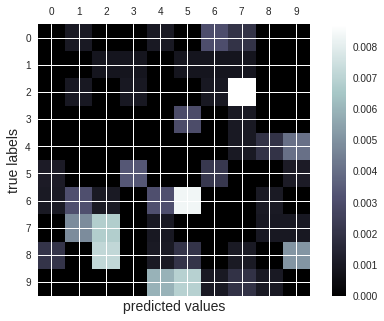

In [16]:
# normalize the diagnal cells so that they don't overpower the rest of the cells when visualized
row_sums = confusion_mtx.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_mtx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
cax = ax.matshow(norm_conf_mx, cmap=plt.cm.bone)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)
fig.colorbar(cax)
plt.ylabel('true labels', fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.savefig('conf.png')
plt.show()

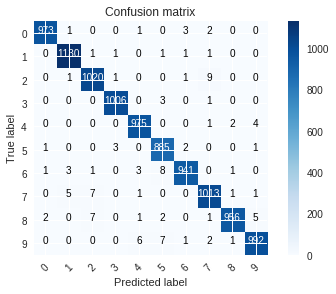

In [17]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Number of misclassification 109


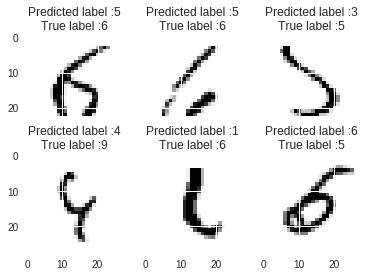

In [18]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)
print("Number of misclassification",sum(errors))
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    # Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)

**Experimentation with LR Find**

In [19]:
!wget https://raw.githubusercontent.com/aman5319/BirdsClassification/master/LrFinder.py
!wget https://raw.githubusercontent.com/aman5319/BirdsClassification/master/utils.py
!wget https://raw.githubusercontent.com/aman5319/BirdsClassification/master/OneCyclePolicy.py

--2019-01-20 06:50:40--  https://raw.githubusercontent.com/aman5319/BirdsClassification/master/LrFinder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3525 (3.4K) [text/plain]
Saving to: ‘LrFinder.py.3’

LrFinder.py.3       100%[===================>]   3.44K  --.-KB/s    in 0s      

2019-01-20 06:50:40 (56.7 MB/s) - ‘LrFinder.py.3’ saved [3525/3525]

--2019-01-20 06:50:43--  https://raw.githubusercontent.com/aman5319/BirdsClassification/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 993 [text/plain]
Saving to: ‘utils.p

## Reset our model weights

In [0]:
model.load_weights('model_random_weights.h5')

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Epoch 1/2
60000/60000 [==============================] - 33s 558us/step - loss: 4.1561 - acc: 0.4857


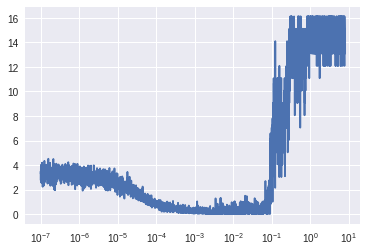

In [22]:
from utils import stepper , annealing_linear,annealing_cos
from LrFinder import LRFinder

lrfind = LRFinder(len(x_train)//16 )
history = model.fit(x_train,y_train ,epochs=2,batch_size=16,shuffle=True ,callbacks=[lrfind] )

W will set up our learning rate to 10e-4

In [23]:
abc
from OneCyclePolicy import OneCycleScheduler

fit_one_cycle = OneCycleScheduler(num_iteration = len(x_train)//16  , num_epochs =4 , max_lr = 10e-3)
his = model.fit(x_train,y_train ,epochs=4,batch_size=batch_size,shuffle=True ,callbacks=[fit_one_cycle] ,validation_data=(x_test,y_test)  )

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 37s 622us/step - loss: 0.1532 - acc: 0.9569 - val_loss: 0.0598 - val_acc: 0.9793
Epoch 2/4
60000/60000 [==============================] - 37s 618us/step - loss: 0.0759 - acc: 0.9767 - val_loss: 0.0600 - val_acc: 0.9819
Epoch 3/4
60000/60000 [==============================] - 37s 623us/step - loss: 0.0456 - acc: 0.9862 - val_loss: 0.0398 - val_acc: 0.9870
Epoch 4/4
60000/60000 [==============================] - 37s 623us/step - loss: 0.0190 - acc: 0.9944 - val_loss: 0.0276 - val_acc: 0.9904


In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.027569407568524183, 0.9904]
